# 讀取資料

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)


Instructions for updating:
non-resource variables are not supported in the long term
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('train images:',mnist.train.images.shape ,'label:',mnist.train.labels.shape)
print('validation images:',mnist.validation.images.shape,'labels:',mnist.validation.labels.shape)
print('test images:',mnist.test.images.shape,'labels:',mnist.test.labels.shape)

train images: (55000, 784) label: (55000, 10)
validation images: (5000, 784) labels: (5000, 10)
test images: (10000, 784) labels: (10000, 10)


# 建立layer函數

In [3]:
def layer(output_dim,input_dim,inputs,activation=None):
    w = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    xwb = tf.matmul(inputs,w)+b
    
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs

# 建立輸入層x

In [4]:
x = tf.placeholder("float",[None,784])

# 建立隱藏層h1

In [5]:
h1 = layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)

# 建立輸出層y

In [6]:
y_predict = layer(output_dim=10,input_dim=1000,inputs=h1,activation=None)

# 定義訓練方式

In [7]:
#建立訓練資料label真實值的placeholder
y_label = tf.placeholder("float",[None,10])

In [8]:
#定義loss function(cross entropy)
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_label, logits=y_predict))

In [9]:
#定義optimizer最優化方法
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [10]:
#定義評估模型準確率
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 訓練模型

In [11]:
#定義訓練參數
trainepochs = 15
batchsize = 100
totalbatchs = int(mnist.train.num_examples/batchsize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
starttime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for epoch in range(trainepochs):
    for i in range(totalbatchs):
        batch_x,batch_y = mnist.train.next_batch(batchsize)
        sess.run(optimizer,feed_dict={x:batch_x,
                                      y_label:batch_y})
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,
                                                            y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:",'%02d' % (epoch+1),"loss=",\
          "{:.9f}".format(loss),"Accuracy=",acc)
duration = time()-starttime
print("Train Finished takes:",duration)

Train Epoch: 01 loss= 9.102302551 Accuracy= 0.8864
Train Epoch: 02 loss= 5.975547791 Accuracy= 0.914
Train Epoch: 03 loss= 4.902111053 Accuracy= 0.9226
Train Epoch: 04 loss= 3.995733500 Accuracy= 0.931
Train Epoch: 05 loss= 3.349400043 Accuracy= 0.938
Train Epoch: 06 loss= 3.302594185 Accuracy= 0.9394
Train Epoch: 07 loss= 3.028103352 Accuracy= 0.947
Train Epoch: 08 loss= 2.826002359 Accuracy= 0.9464
Train Epoch: 09 loss= 2.883895397 Accuracy= 0.9474
Train Epoch: 10 loss= 2.506371975 Accuracy= 0.9524
Train Epoch: 11 loss= 2.586598158 Accuracy= 0.9516
Train Epoch: 12 loss= 2.384158134 Accuracy= 0.9528
Train Epoch: 13 loss= 2.643322229 Accuracy= 0.9508
Train Epoch: 14 loss= 2.381498337 Accuracy= 0.9536
Train Epoch: 15 loss= 2.456316471 Accuracy= 0.9586
Train Finished takes: 43.777387857437134


In [13]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

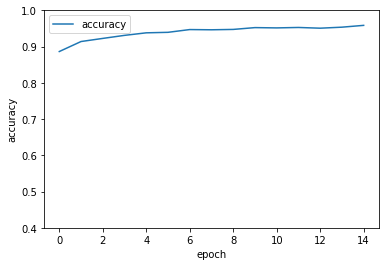

In [14]:
plt.plot(epoch_list,accuracy_list,label='accuracy')
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.ylim(0.4,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
#評估模型準確率
print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,
                                               y_label:mnist.test.labels}))

Accuracy: 0.957


In [16]:
#預測
prediction_result = sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 8, 9, 6, 9], dtype=int64)

In [17]:
import numpy as np
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


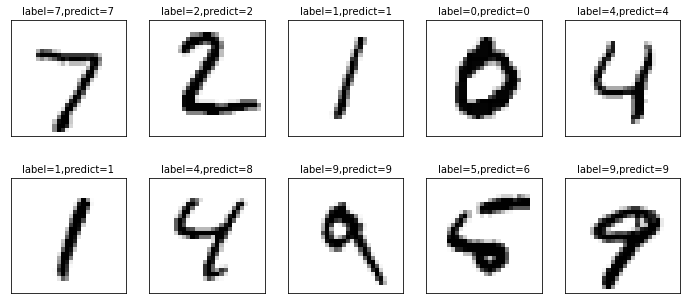

In [18]:
decoded = input_data.read_data_sets("MNIST_data/",one_hot = False)
decoded.test.labels
plot_image_labels_prediction(mnist.test.images,decoded.test.labels,prediction_result,idx=0)